# Support Vector Machine

## 1. Import Libraries

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 2. Load Data

In [64]:
data = pd.read_csv('iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [65]:
data = data.drop(columns = ['Id'])

In [66]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## 3. Data Preparation

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
data_var = data.columns.values.tolist()

In [70]:
y = ['Species']
x = [i for i in data_var if i not in y]

In [71]:
print(x)
print(y)

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
['Species']


In [72]:
X_train, X_test, y_train, y_test = train_test_split(data[x], data[y], test_size = 0.2, random_state = 1)

In [73]:
print("Jumlah Training X", X_train.shape[0])

Jumlah Training X 120


In [74]:
print("Jumlah Training Y", y_train.shape[0])

Jumlah Training Y 120


In [75]:
print("Jumlah Test X", X_test.shape[0])

Jumlah Test X 30


In [76]:
print("Jumlah Test Y", y_test.shape[0])

Jumlah Test Y 30


## 4. Training SVM Model

In [77]:
from sklearn import svm

In [78]:
svm_model = svm.SVC(kernel = 'rbf', C=1, gamma = 0.01)

In [79]:
svm_model.fit(X_train, y_train)

SVC(C=1, gamma=0.01)

#### Accuracy

In [80]:
svm_score = svm_model.score(X_test, y_test)

In [81]:
print("Model Accuracy is", svm_score)

Model Accuracy is 0.9333333333333333


#### Support Vector

In [82]:
support_vector = svm_model.support_vectors_

In [83]:
support_vector

array([[5.7, 3.8, 1.7, 0.3],
       [4.8, 3. , 1.4, 0.3],
       [5.1, 3.4, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.1, 3.3, 1.7, 0.5],
       [4.9, 3.1, 1.5, 0.1],
       [4.5, 2.3, 1.3, 0.3],
       [5. , 3.4, 1.6, 0.4],
       [5. , 3.5, 1.6, 0.6],
       [4.8, 3.4, 1.9, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.7, 0.2],
       [5. , 3. , 1.6, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [6.1, 3. , 4.6, 1.4],
       [5.6, 2.5, 3.9, 1.1],
       [5.5, 2.3, 4. , 1.3],
       [6.5, 2.8, 4.6, 1.5],
       [6.6, 2.9, 4.6, 1.3],
       [5.2, 2.7, 3.9, 1.4],
       [6. , 3.4, 4.5, 1.6],
       [5.7, 3. , 4.2, 1.2],
       [6.7, 3.1, 4.4, 1.4],
       [5.7, 2.8, 4.5, 1.3],
       [6. , 2.2, 4. , 1. ],
       [6.4, 2.9, 4.3, 1.3],
       [5. , 2.3, 3.3, 1. ],
       [5.5, 2.5, 4. , 1.3],
       [6. , 2.7, 5.1, 1.6],
       [5.8, 2.7, 4.1, 1. ],
       [6.2, 2.9, 4.3, 1.3],
       [6.3, 2.3, 4.4, 1.3],
       [5.6, 2.9, 3.6, 1.3],
       [5.8, 2

#### GridSearchCV

GridSearch digunakan untuk mencari model svm dengan score terbaik

In [84]:
from sklearn.model_selection import GridSearchCV

In [85]:
svm_model2 = svm.SVC()

In [86]:
parameters = {
    'C' : [0.1, 0.2, 0.5, 1], 
    'kernel' : ['linear', 'poly', 'rbf'], 
    'gamma' : [0.01, 0.1, 1]
}

In [87]:
svm_grid = GridSearchCV(svm_model2, parameters, cv = 5)

In [88]:
svm_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 0.2, 0.5, 1], 'gamma': [0.01, 0.1, 1],
                         'kernel': ['linear', 'poly', 'rbf']})

Menentukan parameter terbaik untuk svm

In [89]:
svm_grid.best_params_

{'C': 0.5, 'gamma': 0.01, 'kernel': 'linear'}

Melihat score terbaik

In [90]:
svm_grid.best_score_

0.9833333333333334

## 5. Model Visualization

Source: https://medium.com/swlh/visualizing-svm-with-python-4b4b238a7a92

#### Check Dataset

In [91]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
91,6.1,3.0,4.6,1.4
135,7.7,3.0,6.1,2.3
69,5.6,2.5,3.9,1.1
128,6.4,2.8,5.6,2.1
114,5.8,2.8,5.1,2.4


In [92]:
y_train.head()

,Species
91,Iris-versicolor
135,Iris-virginica
69,Iris-versicolor
128,Iris-virginica
114,Iris-virginica


##### Take Two Features and Two Classes

In [93]:
data2 = X_train.drop(['SepalLengthCm', 'SepalWidthCm'], axis = 1)

In [94]:
data2.head()

,PetalLengthCm,PetalWidthCm
91,4.6,1.4
135,6.1,2.3
69,3.9,1.1
128,5.6,2.1
114,5.1,2.4


In [95]:
data2['Species'] = y_train['Species']

In [96]:
data2.head()

,PetalLengthCm,PetalWidthCm,Species
91,4.6,1.4,Iris-versicolor
135,6.1,2.3,Iris-virginica
69,3.9,1.1,Iris-versicolor
128,5.6,2.1,Iris-virginica
114,5.1,2.4,Iris-virginica


In [97]:
#let's convert categorical values to numerical target
data2 =data2.replace('Iris-setosa', 0)
data2 =data2.replace('Iris-versicolor', 1)

In [98]:
data2.head()

,PetalLengthCm,PetalWidthCm,Species
91,4.6,1.4,1
135,6.1,2.3,Iris-virginica
69,3.9,1.1,1
128,5.6,2.1,Iris-virginica
114,5.1,2.4,Iris-virginica


In [100]:
# Remove 'Iris-virginica' class
data2 = data2[(data2['Species'] != 'Iris-virginica')]
data2.head()

,PetalLengthCm,PetalWidthCm,Species
91,4.6,1.4,1
69,3.9,1.1,1
48,1.5,0.2,0
53,4.0,1.3,1
28,1.4,0.2,0


#### Split Data Again

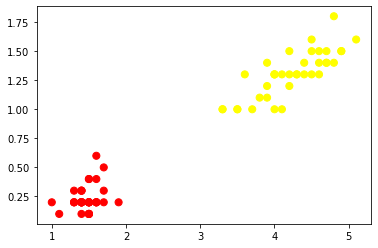

In [102]:
X2 = data2.iloc[:,0:2]
y2 = data2['Species']
plt.scatter(X2.iloc[:, 0], X2.iloc[:, 1], c=y2, s=50, cmap='autumn')

#### Train a SVM Model

In [103]:
svm_model2 = svm.SVC(kernel = 'linear', C=0.5, gamma = 0.01)

In [104]:
X2.head()

,PetalLengthCm,PetalWidthCm
91,4.6,1.4
69,3.9,1.1
48,1.5,0.2
53,4.0,1.3
28,1.4,0.2


In [106]:
y3 = y2.to_frame()
y3.head()

,Species
91,1
69,1
48,0
53,1
28,0


In [107]:
#let's convert numerical values to categorical target
y3 = y3.replace(0, 'Iris-setosa')
y3 = y3.replace(1, 'Iris-versicolor')

In [108]:
y3.head()

,Species
91,Iris-versicolor
69,Iris-versicolor
48,Iris-setosa
53,Iris-versicolor
28,Iris-setosa


In [109]:
svm_model2.fit(X2, y3)

SVC(C=0.5, gamma=0.01, kernel='linear')

#### Support Vector

In [110]:
svm_model2.support_vectors_

array([[1.7, 0.5],
       [1.9, 0.2],
       [3.3, 1. ],
       [3.3, 1. ]])

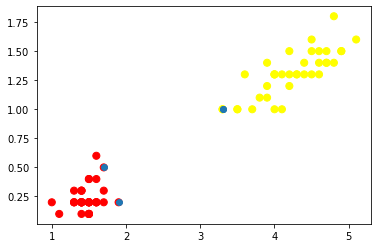

In [111]:
plt.scatter(X2.iloc[:, 0], X2.iloc[:, 1], c=y2, s=50, cmap='autumn')
plt.scatter(svm_model2.support_vectors_[:,0],svm_model2.support_vectors_[:,1])

#### Visualize SVM

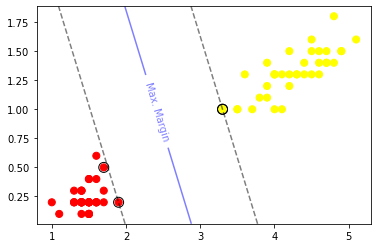

In [144]:
ax = plt.gca()
plt.scatter(X2.iloc[:, 0], X2.iloc[:, 1], c=y2, s=50, cmap='autumn')
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm_model2.decision_function(xy).reshape(XX.shape)

cs = ax.contour(XX, YY, Z, colors=['black', 'blue','black'], alpha=0.5, levels=[-0.94, 0.03, 1],
                linestyles=['--', '-', '--'])
plt.clabel(cs, levels = [0.03], fmt = 'Max. Margin', colors = 'blue')

ax.scatter(svm_model2.support_vectors_[:, 0], svm_model2.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()